In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from IPython.display import IFrame

IFrame('Boyce_12e_PPT_ch02_2.pdf', width=1000, height=700)

In [6]:
from demo2 import run_demo
run_demo()

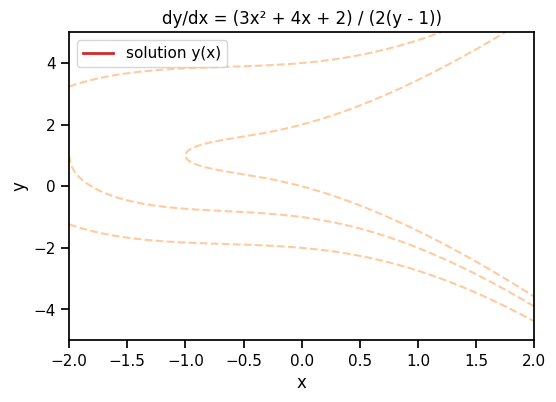

interactive(children=(FloatSlider(value=2.0, description='y(0)=', max=5.0, min=-3.0), Output()), _dom_classes=…

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_context('notebook')

def solve_custom_solution(x, c, branch="+"):
    x = np.asarray(x, dtype=float)
    expr = x**3 + 2*x**2 + 2*x + c
    valid = expr >= 0
    result = np.full_like(expr, np.nan)

    sqrt_expr = np.sqrt(expr[valid])
    if branch == "+":
        result[valid] = 1 + sqrt_expr
    else:
        result[valid] = 1 - sqrt_expr

    return result

def get_particular_solution(y0, x0=0):
    expr0 = x0**3 + 2*x0**2 + 2*x0
    c = (y0 - 1)**2 - expr0
    branch = "+" if y0 >= 1 else "-"
    return lambda x: solve_custom_solution(x, c, branch)

def generate_multiple_solutions(ax, x_range, seeds, solution_func, style="--", color="C1", alpha=0.4):
    x = np.linspace(*x_range, 400)
    for y in seeds:
        y_func = solution_func(y)
        y_vals = y_func(x)
        ax.plot(x, y_vals, style, color=color, alpha=alpha)

def interactive_solution_plot(x_range=(-2, 2), y_range=(-5, 5), y0_default=2.0,
                               seeds=[-2, -1, 0, 2, 4], title="dy/dx = (3x² + 4x + 2) / (2(y - 1))"):
    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 400)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)

    generate_multiple_solutions(ax, x_range, seeds, get_particular_solution)

    line, = ax.plot([], [], lw=2, color="C3", label="solution y(x)")
    ax.legend(loc="upper left")

    @widgets.interact(y0=widgets.FloatSlider(min=-3, max=5, step=0.1,
                                              value=y0_default, description="y(0)="))
    def _update(y0):
        y_func = get_particular_solution(y0)
        y_vals = y_func(x)
        line.set_data(x, y_vals)
        fig.canvas.draw_idle()

    return fig

def run_demo():
    interactive_solution_plot()

run_demo()
